### Acerca del estado del Pokemon:

a) ¿Las condiciones de salud tienen algun efecto sobre la efectividad de la captura? Si es ası, ¿Cual es mas o menos efectiva?

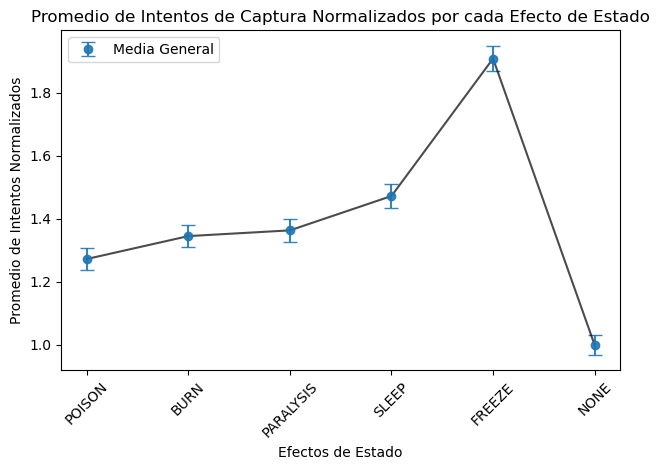

In [33]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball"]
n_attempts = 100
effects_data = {effect: [] for effect in StatusEffect}
for pokemon_name in pokemons:
    lvl = 100
    hp = 1
    for ball in pokeballs:
        for effect in StatusEffect:
            pokeball_attempts = []
            pokemon = factory.create(pokemon_name, lvl, effect, hp)
            for _ in range(n_attempts):
                attempt, rate = attempt_catch(pokemon, ball)
                pokeball_attempts.append(attempt)
            effects_data[effect].extend(pokeball_attempts)
status_effects = [effect.name for effect in StatusEffect]
fig, ax = plt.subplots()
index = np.arange(len(status_effects))
overall_means = []
overall_std_devs = []

for effect in StatusEffect:
    overall_means.append(np.mean(effects_data[effect]))
    overall_std_devs.append(np.std(effects_data[effect]))

none_mean = np.mean(effects_data[StatusEffect.NONE])
normalized_means = [mean / none_mean for mean in overall_means]
ax.errorbar(index, normalized_means, yerr=overall_std_devs/np.sqrt(n_attempts), fmt='o', capsize=5, alpha=0.9, label='Media General')
ax.plot(index, normalized_means, 'k-', alpha=0.7)
ax.set_xlabel('Efectos de Estado')
ax.set_ylabel('Promedio de Intentos Normalizados')
ax.set_title('Promedio de Intentos de Captura Normalizados por cada Efecto de Estado')
ax.set_xticks(index)
ax.set_xticklabels(status_effects, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

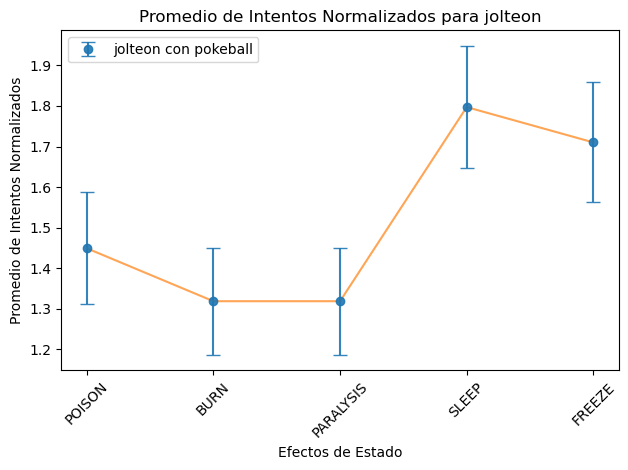

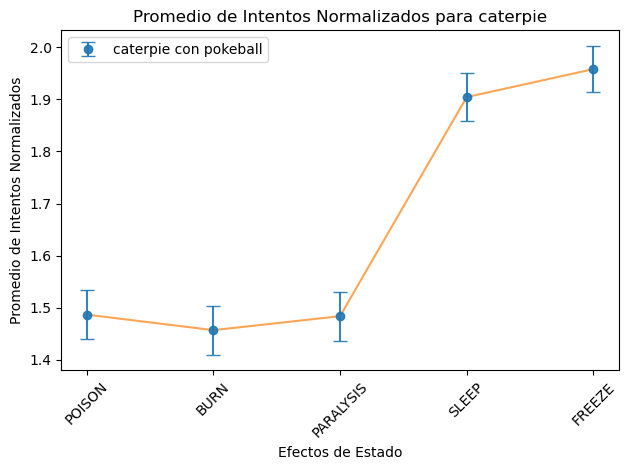

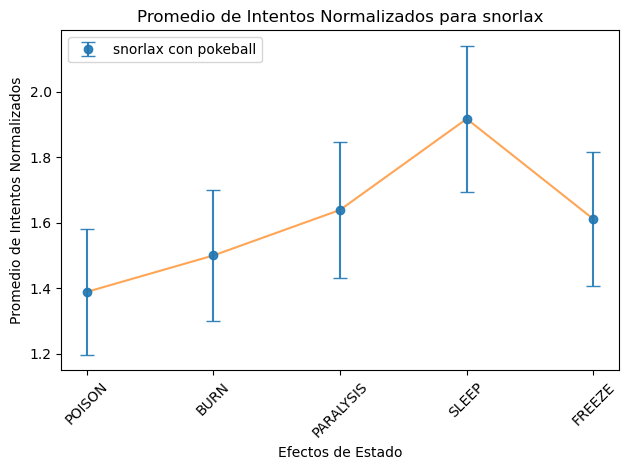

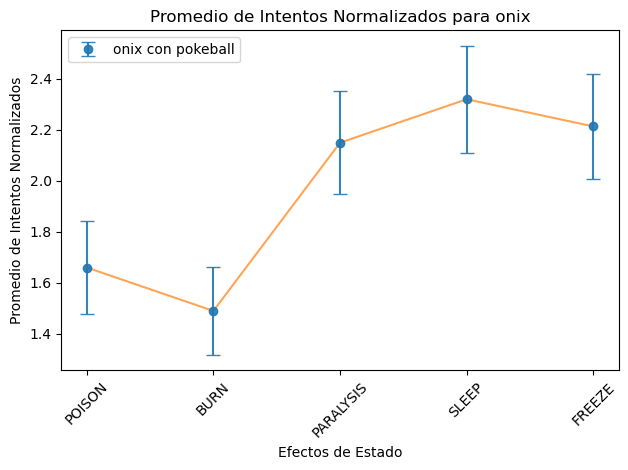

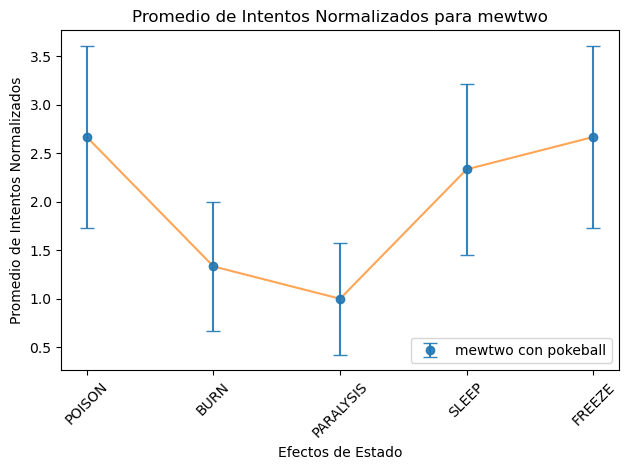

In [32]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball"]
effects_data = {}
n_attempts = 1000

for pokemon_name in pokemons:
    effects_data[pokemon_name] = {}
    lvl = 100
    hp = 1
    for ball in pokeballs:
        effects_data[pokemon_name][ball] = {}
        for effect in StatusEffect:
            means = []
            std_devs = []
            pokeball_attempts = []
            pokemon = factory.create(pokemon_name, lvl, effect, hp)
            for _ in range(n_attempts):
                attempt, rate = attempt_catch(pokemon, ball)
                pokeball_attempts.append(attempt)
            mean = np.mean(pokeball_attempts)
            std_dev = np.std(pokeball_attempts, ddof=1)
            means.append(mean)
            std_devs.append(std_dev)
            effects_data[pokemon_name][ball][effect] = {
                "means": means,
                "std_devs": std_devs
            }

for pokemon_name in pokemons:
    for ball in pokeballs:
        none_mean = effects_data[pokemon_name][ball][StatusEffect.NONE]["means"][0]
        if none_mean != 0:
            for effect in StatusEffect:
                if effect != StatusEffect.NONE:
                    effects_data[pokemon_name][ball][effect]["means"][0] /= none_mean
                    effects_data[pokemon_name][ball][effect]["std_devs"][0] /= none_mean
        else:
            print(f"Warning: NONE mean is zero for {pokemon_name} with {ball}, skipping normalization.")

for pokemon_name in pokemons:
    for ball in pokeballs:
        del effects_data[pokemon_name][ball][StatusEffect.NONE]

status_effects = [effect.name for effect in StatusEffect if effect != StatusEffect.NONE]

for pokemon_name in pokemons:
    for ball in pokeballs:
        fig, ax = plt.subplots()
        
        means = [effects_data[pokemon_name][ball][effect]["means"][0] for effect in StatusEffect if effect != StatusEffect.NONE]
        std_devs = [effects_data[pokemon_name][ball][effect]["std_devs"][0] for effect in StatusEffect if effect != StatusEffect.NONE]
        index = np.arange(len(status_effects))
        ax.errorbar(index, means, yerr=std_devs/np.sqrt(n_attempts), fmt='o', capsize=5, alpha=0.9, label=f'{pokemon_name} con {ball}')
        ax.plot(index, means, alpha=0.7)
        ax.set_xlabel('Efectos de Estado')
        ax.set_ylabel('Promedio de Intentos Normalizados')
        ax.set_title(f'Promedio de Intentos Normalizados para {pokemon_name}')
        ax.set_xticks(index)
        ax.set_xticklabels(status_effects, rotation=45)
        ax.legend()
        plt.tight_layout()
        plt.show()

 b) ¿Como afectan los puntos de vida a la efectividad de la captura?  Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parametros  constantes, calcular la probabilidad de captura para distintos HP%

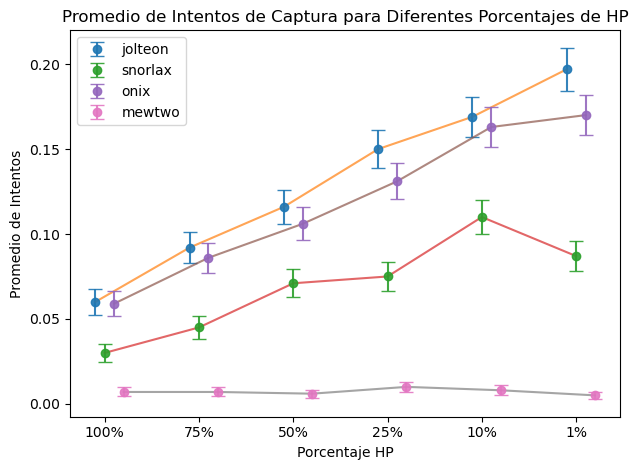

In [31]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball"]
hp_percentages = [1, 0.75, 0.5, 0.25, 0.1, 0.01]
hp_effects_data = {}
n_attempts = 1000

for pokemon_name in pokemons:
    hp_effects_data[pokemon_name] = {}
    lvl = 100
    effect = StatusEffect.NONE

    for hp_percentage in hp_percentages:
        pokeball_attempts = []
        hp = hp_percentage
        pokemon = factory.create(pokemon_name, lvl, effect, hp)
        for _ in range(n_attempts):
            attempt, rate = attempt_catch(pokemon, pokeballs[0])
            pokeball_attempts.append(attempt)
        mean = np.mean(pokeball_attempts)
        std_dev = np.std(pokeball_attempts)
        hp_effects_data[pokemon_name][hp_percentage] = {
            "mean": mean,
            "std_dev": std_dev
        }

fig, ax = plt.subplots()
index = np.arange(len(hp_percentages))

for i, pokemon_name in enumerate(pokemons):
    means = [hp_effects_data[pokemon_name][hp]["mean"] for hp in hp_percentages]
    std_devs = [hp_effects_data[pokemon_name][hp]["std_dev"] for hp in hp_percentages]
    scatter_positions = index + i * 0.1
    ax.errorbar(scatter_positions, means, yerr=std_devs/np.sqrt(n_attempts), fmt='o', capsize=5, alpha=0.9, label=pokemon_name)
    ax.plot(scatter_positions, means, alpha=0.7)
ax.set_xlabel('Porcentaje HP')
ax.set_ylabel('Promedio de Intentos')
ax.set_title('Promedio de Intentos de Captura para Diferentes Porcentajes de HP')
ax.set_xticks(index + 0.1)
ax.set_xticklabels([f"{int(hp * 100)}%" for hp in hp_percentages])
ax.legend()
plt.tight_layout()
plt.show()

#### Analisis con ruido

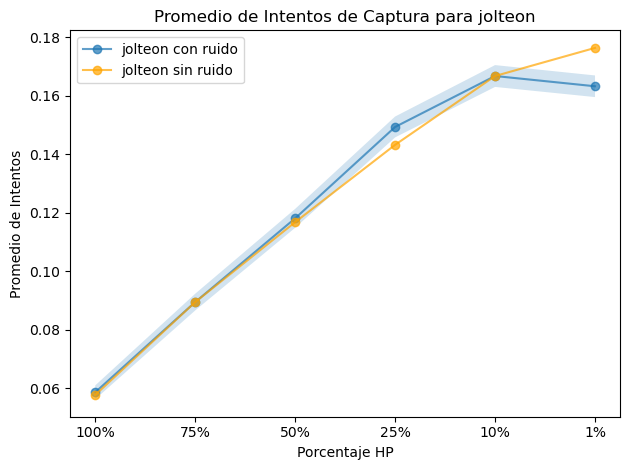

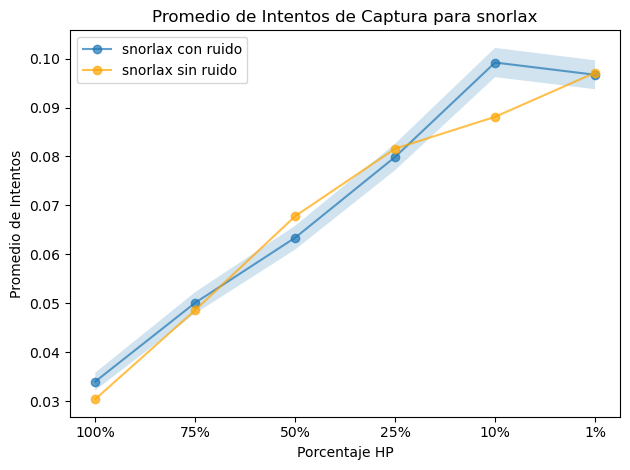

In [30]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "snorlax"]
pokeballs = ["pokeball"]
hp_percentages = [1, 0.75, 0.5, 0.25, 0.1, 0.01]
hp_effects_data = {}
hp_effects_data_not_noise = {}
n_attempts = 10000

for pokemon_name in pokemons:
    hp_effects_data[pokemon_name] = {}
    hp_effects_data_not_noise[pokemon_name] = {}
    lvl = 100
    effect = StatusEffect.NONE

    for hp_percentage in hp_percentages:
        pokeball_attempts = []
        pokeball_attempts_notnoise = []
        hp = hp_percentage
        pokemon = factory.create(pokemon_name, lvl, effect, hp)

        for _ in range(n_attempts):
            attempt, rate = attempt_catch(pokemon, pokeballs[0], 0.15)
            attempt_noisent, rate_noisent = attempt_catch(pokemon, pokeballs[0])
            pokeball_attempts.append(1 if attempt else 0)
            pokeball_attempts_notnoise.append(1 if attempt_noisent else 0)

        mean = np.mean(pokeball_attempts)
        std_dev = np.std(pokeball_attempts)
        mean_notnoise = np.mean(pokeball_attempts_notnoise)
        std_dev_notnoise = np.std(pokeball_attempts_notnoise)

        hp_effects_data[pokemon_name][hp_percentage] = {
            "mean": mean,
            "std_dev": std_dev
        }

        hp_effects_data_not_noise[pokemon_name][hp_percentage] = {
            "mean": mean_notnoise,
            "std_dev": std_dev_notnoise
        }

for pokemon_name in pokemons:
    fig, ax = plt.subplots()

    means = [hp_effects_data[pokemon_name][hp]["mean"] for hp in hp_percentages]
    std_devs = [hp_effects_data[pokemon_name][hp]["std_dev"] for hp in hp_percentages]
    means_notnoise = [hp_effects_data_not_noise[pokemon_name][hp]["mean"] for hp in hp_percentages]
    std_devs_notnoise = [hp_effects_data_not_noise[pokemon_name][hp]["std_dev"] for hp in hp_percentages]

    index = np.arange(len(hp_percentages))

    ax.fill_between(index, np.array(means) - np.array(std_devs/np.sqrt(n_attempts)), np.array(means) + np.array(std_devs/np.sqrt(n_attempts)), alpha=0.2)
    ax.plot(index, means, 'o-', alpha=0.7, label=f'{pokemon_name} con ruido')

    ax.plot(index, means_notnoise, 'o-', alpha=0.7, label=f'{pokemon_name} sin ruido', color='orange')

    ax.set_xlabel('Porcentaje HP')
    ax.set_ylabel('Promedio de Intentos')
    ax.set_title(f'Promedio de Intentos de Captura para {pokemon_name}')
    ax.set_xticks(index)
    ax.set_xticklabels([f"{int(hp * 100)}%" for hp in hp_percentages])
    ax.legend()
    plt.tight_layout()
    plt.show()

 c) ¿Que parametros son los que mas afectan la probabilidad de captura?

1. Pokéball Type:  
 The type of Pokéball used significantly affects the capture probability. For example, the Fast Ball generally has the lowest mean attempts, indicating higher effectiveness, while the Heavy Ball often has the highest mean attempts, indicating lower effectiveness. Sin embargo, la elección de la Pokéball también depende del Pokémon específico y sus propiedades.
2. Status Effect:  
 Status effects like Sleep and Freeze improve the capture probability compared to no status effect (NONE). For instance, the mean attempts are generally lower when Snorlax is asleep or freeze. Sin embargo, el resto son practicamente iguales en cuanto a la mejoria que ofrecen. Cabe destacar que llevandolo a la ralidad POISON y BURN son tan efectivos como paralisis pero uno corre el riesgo de matar al pokemon, ya que les reduce la vida ronda a ronda. 
3. HP Percentage:  
 Lower HP percentages generally result in fewer mean attempts, indicating a higher capture probability. For example, Snorlax at 1% HP is easier to capture than at 100% HP.
4. Level:
 The level of Snorlax also affects the capture probability, but the impact is less pronounced compared to the other parameters. Higher levels tend to slightly increase the mean attempts required.

 d) Teniendo en cuenta uno o dos pokemones distintos: ¿Que combinacion de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

In [29]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np

factory = PokemonFactory("../pokemon.json")

pokemons = ["jolteon", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball", "fastball", "ultraball", "heavyball"]
hp_percentages = [0.01, 0.25, 0.50, 0.75, 1]
best_conditions_data = {}
n_attempts = 10000

for pokemon_name in pokemons:
    best_conditions_data[pokemon_name] = {}
    lvl = 100  # Fixed level

    for hp_percentage in hp_percentages:
        best_conditions_data[pokemon_name][hp_percentage] = {}

        for ball in pokeballs:
            best_conditions_data[pokemon_name][hp_percentage][ball] = {}

            for effect in StatusEffect:
                pokeball_attempts = []

                hp = hp_percentage

                pokemon = factory.create(pokemon_name, lvl, effect, hp)

                for _ in range(n_attempts):
                    attempt, rate = attempt_catch(pokemon, ball)
                    pokeball_attempts.append(attempt)

                mean = np.mean(pokeball_attempts)
                std_dev = np.std(pokeball_attempts)

                best_conditions_data[pokemon_name][hp_percentage][ball][effect.name] = {
                    "mean": mean,
                    "std_dev": std_dev
                }

for pokemon_name in best_conditions_data:
    highest_mean = 0
    best_conditions = []
    for hp_percentage in best_conditions_data[pokemon_name]:
        for ball in best_conditions_data[pokemon_name][hp_percentage]:
            for effect in best_conditions_data[pokemon_name][hp_percentage][ball]:
                mean_attempts = best_conditions_data[pokemon_name][hp_percentage][ball][effect]["mean"]
                if mean_attempts > highest_mean:
                    highest_mean = mean_attempts
                    best_conditions = [(hp_percentage, ball, effect)]
                elif mean_attempts == highest_mean:
                    best_conditions.append((hp_percentage, ball, effect))
    print(f"Highest mean attempts for {pokemon_name}:")
    for hp_percentage, ball, effect in best_conditions:
        print(f"  HP {hp_percentage*100}% with {ball}: {effect} with mean attempts {highest_mean:.2f}")

Highest mean attempts for jolteon:
  HP 1.0% with fastball: SLEEP with mean attempts 1.00
  HP 1.0% with fastball: PARALYSIS with mean attempts 1.00
  HP 25.0% with fastball: SLEEP with mean attempts 1.00
Highest mean attempts for snorlax:
  HP 1.0% with heavyball: SLEEP with mean attempts 0.50
Highest mean attempts for onix:
  HP 1.0% with ultraball: SLEEP with mean attempts 0.70
Highest mean attempts for mewtwo:
  HP 1.0% with fastball: SLEEP with mean attempts 0.09


e) Apartir del punto anterior, ¿serıa efectiva otra combinacion de parametros teniendo en cuenta un nivel del pokemon mas bajo (o mas alto)?

In [28]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball", "fastball", "ultraball", "heavyball"]
levels = [1, 100]
hp_percentages = [0.01, 1]
best_conditions_data = {}
n_attempts = 10000

for pokemon_name in pokemons:
    best_conditions_data[pokemon_name] = {}

    for lvl in levels:
        best_conditions_data[pokemon_name][lvl] = {}

        for hp_percentage in hp_percentages:
            best_conditions_data[pokemon_name][lvl][hp_percentage] = {}

            for ball in pokeballs:
                best_conditions_data[pokemon_name][lvl][hp_percentage][ball] = {}

                for effect in StatusEffect:
                    pokeball_attempts = []
                    hp = hp_percentage
                    pokemon = factory.create(pokemon_name, lvl, effect, hp)

                    counter = 0
                    for _ in range(n_attempts):
                        attempt, rate = attempt_catch(pokemon, ball)
                        if attempt:
                            pokeball_attempts.append(1)
                        else:
                            pokeball_attempts.append(0)

                    mean = np.mean(pokeball_attempts)
                    std_dev = np.std(pokeball_attempts)

                    best_conditions_data[pokemon_name][lvl][hp_percentage][ball][effect.name] = {
                        "mean": mean,
                        "std_dev": std_dev
                    }

for pokemon_name in best_conditions_data:
    print(f"Top 3 highest mean attempts for {pokemon_name}:")
    for lvl in best_conditions_data[pokemon_name]:
        mean_attempts_list = []
        for hp_percentage in best_conditions_data[pokemon_name][lvl]:
            for ball in best_conditions_data[pokemon_name][lvl][hp_percentage]:
                for effect in best_conditions_data[pokemon_name][lvl][hp_percentage][ball]:
                    mean_attempts = best_conditions_data[pokemon_name][lvl][hp_percentage][ball][effect]["mean"]
                    mean_attempts_list.append((mean_attempts, lvl, hp_percentage, ball, effect))
        
        mean_attempts_list.sort(reverse=True, key=lambda x: x[0])
        top_3_conditions = mean_attempts_list[:3]
        
        print(f"  Level {lvl}:")
        for mean_attempts, lvl, hp_percentage, ball, effect in top_3_conditions:
            print(f" HP {hp_percentage*100}% with {ball}: {effect} with mean attempts {mean_attempts:.2f}")

Top 3 highest mean attempts for jolteon:
  Level 1:
 HP 1.0% with fastball: SLEEP with mean attempts 1.00
 HP 1.0% with ultraball: SLEEP with mean attempts 0.66
 HP 100% with fastball: SLEEP with mean attempts 0.46
  Level 100:
 HP 1.0% with fastball: SLEEP with mean attempts 1.00
 HP 1.0% with ultraball: SLEEP with mean attempts 0.70
 HP 100% with fastball: SLEEP with mean attempts 0.47
Top 3 highest mean attempts for snorlax:
  Level 1:
 HP 1.0% with heavyball: SLEEP with mean attempts 0.48
 HP 1.0% with ultraball: SLEEP with mean attempts 0.37
 HP 1.0% with fastball: SLEEP with mean attempts 0.19
  Level 100:
 HP 1.0% with heavyball: SLEEP with mean attempts 0.50
 HP 1.0% with ultraball: SLEEP with mean attempts 0.39
 HP 1.0% with fastball: SLEEP with mean attempts 0.19
Top 3 highest mean attempts for onix:
  Level 1:
 HP 1.0% with ultraball: SLEEP with mean attempts 0.66
 HP 1.0% with heavyball: SLEEP with mean attempts 0.48
 HP 1.0% with fastball: SLEEP with mean attempts 0.34
  L